In [1]:
import random
import math
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import chisquare
import numpy as np

### a) Generar 100.000 muestras, calcular la media y la varianza de la distribución obtenida y comparar con los valores teóricos.

Para este ejercicio usaremos el método de Aceptación - Rechazo

In [2]:
media = 15 # dato del enunciado
desvio = 2 # dato del enunciado
muestras = 100_000 # dato del enunciado
c = 1.3 # es fx/fy que maximiza el cociente

In [3]:
resultados = []

def cociente(t):
    # es la division de fx/c*fy
    return (1 / math.sqrt(2 * math.pi)) * math.exp(t - (t**2 / 2)) * 1/c

for i in range(muestras):
    t = random.expovariate(1) # muestra exponencial de media 1
    u = random.random()
    if u < cociente(t):
        u2 = random.random()
        if u2 < 0.5:
            resultados.append(t)
        else:
            resultados.append(-t)

In [4]:
# aplicamos transformacion de Normal std a lo pedido
transformada = [r * desvio + media for r in resultados]

In [5]:
print(f'Esperanza real: {media} - Esperanza simulada: {np.mean(transformada)}')
print(f'Varianza real: {desvio**2} - Varianza simulada: {np.var(transformada)}')


Esperanza real: 15 - Esperanza simulada: 15.002860654197073
Varianza real: 4 - Varianza simulada: 4.010553088658027


### b) Calcular el factor de rendimiento del método propuesto.

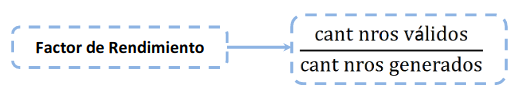

In [6]:
numeros_validos = len(transformada)

In [7]:
factor_rendimiento = numeros_validos / muestras

In [8]:
print(f"El factor de rendimiento del método propuesto es {round(factor_rendimiento, 2)}")

El factor de rendimiento del método propuesto es 0.39


### c) Mostrar gráficamente la distribución que siguen las muestras generadas.

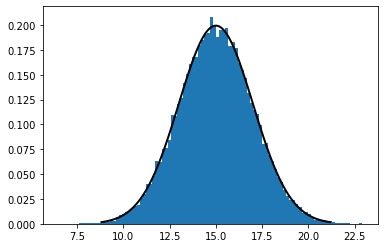

In [9]:
# creo la normal real para plotear la curva y comparar
x_real = np.linspace(norm.ppf(0.001, media, desvio), norm.ppf(0.999, media, desvio), 100)
fig, ax = plt.subplots(1, 1)

y_real = norm(media, desvio)
ax.plot(x_real, y_real.pdf(x_real), 'k-', lw = 2)

ax.hist(transformada, 100, density=True)
plt.show()

### d) Proponer un test para verificar si los números generados siguen la distribución pedida.

Para verificar si los numeros generados siguen la distribución pedida usaremos un test estadístico.
El que usaremos es el método de chi^2, que justamente consiste en comparar 2 distribuciones de probabilidades:
- una la obtuvimos simulando, la llamaremos observada
- la otra es la que el experimento sigue, la llamaremos esperada

Cuanto más chica sea la diferencia entre ambas, más podemos confirmar que siguen la distribución pedida.

Además, como es una variable continua, tendremos que discretizar. Para eso tomaremos los valores del experimento truncando los decimales.

In [10]:
freq_esperadas = [0.0001, 0.0004, 0.002, 0.0175, 0.03, 0.075, 0.10, 0.175, 0.2, 0.175, 0.10, 0.075, 0.03, 0.0175, 0.002, 0.0004, 0.0001]

In [11]:
observados = [round(i) for i in transformada]

In [12]:
observados = [round(i) for i in observados if (i > 6 & i < 23)]

In [13]:
cantidad_valores_distintos = len(set(observados))

In [14]:
cantidad_valores_distintos

17

In [15]:
# cuento las apariciones
# para respetar el orden posicional en la lista, le resto el mínimo
min_value = min(observados)
observados_count = [0 for i in range(cantidad_valores_distintos)]
for i in observados:
    observados_count[i - min_value] += 1

In [16]:
len(observados_count)

17

In [17]:
cantidad = len(observados)
freq_observados = [i/cantidad for i in observados_count]

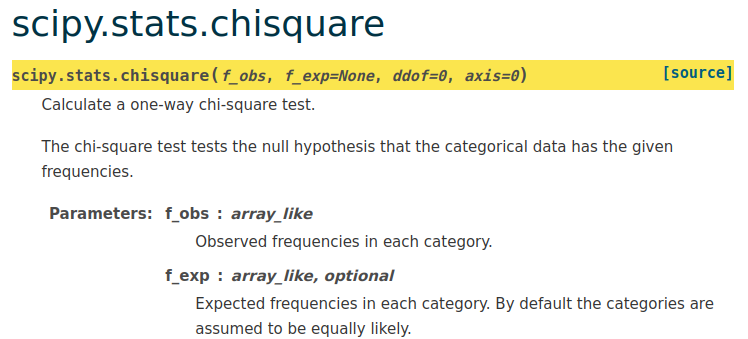

In [18]:
statistic, pvalue = chisquare(freq_observados, f_exp=freq_esperadas)

print(statistic)
print(pvalue)

#si pvalue <= alfa entonces rechazo H0 (digo que son distintas)

if pvalue <= 0.05:
    print("Las distribuciones NO se parecen")
else:
    print("Las distribuciones coinciden")

0.01955361658915718
1.0
Las distribuciones coinciden
